<a href="https://colab.research.google.com/github/kabeerbora/1980s_delin/blob/main/visualizations_delin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

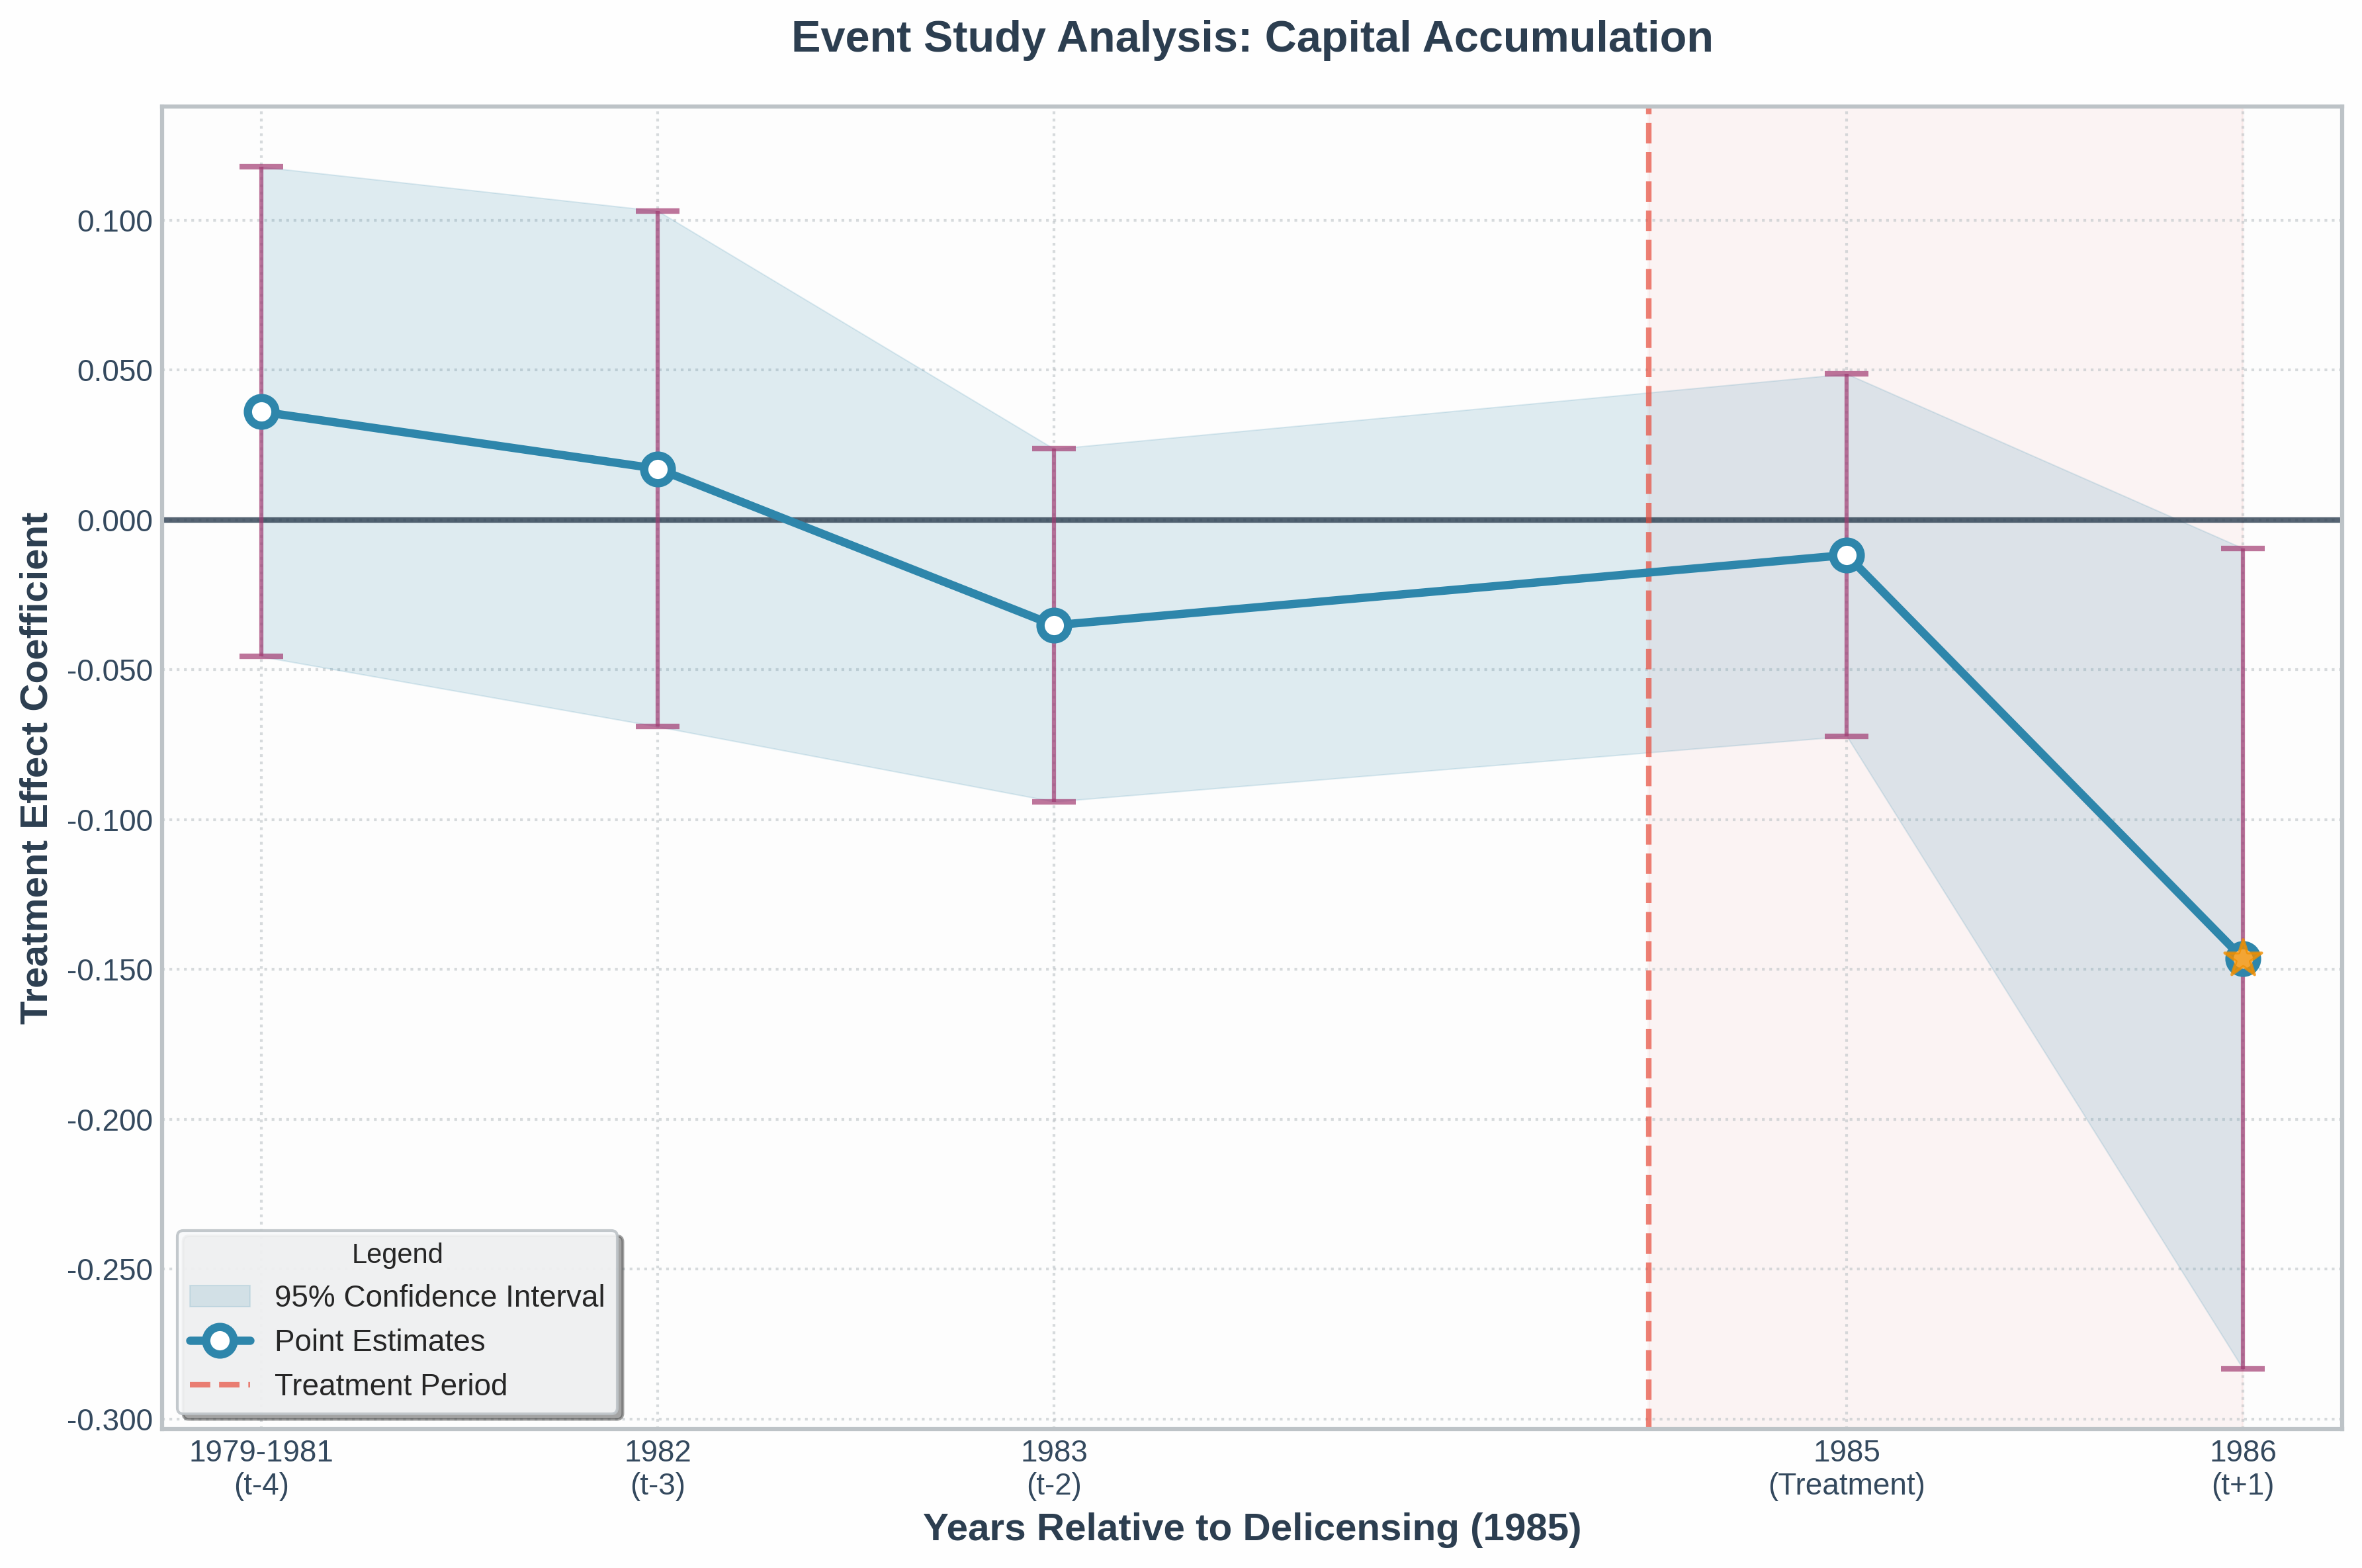

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
time_points = [-4, -3, -2, 0, 1]
estimates = [0.036132, 0.017091, -0.035123, -0.011674, -0.146366]
std_errors = [0.041686, 0.043894, 0.030023, 0.030839, 0.069850]
ci_lower = [est - 1.96 * se for est, se in zip(estimates, std_errors)]
ci_upper = [est + 1.96 * se for est, se in zip(estimates, std_errors)]

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
primary_color = '#2E86AB'
secondary_color = '#A23B72'
accent_color = '#F18F01'
neutral_color = '#C73E1D'
ax.fill_between(time_points, ci_lower, ci_upper,
                color=primary_color, alpha=0.15,
                label='95% Confidence Interval',
                edgecolor=primary_color, linewidth=0.5)

ax.plot(time_points, estimates,
        color=primary_color, linewidth=3,
        marker='o', markersize=10,
        markerfacecolor='white',
        markeredgecolor=primary_color,
        markeredgewidth=3,
        label='Point Estimates',
        zorder=5)

ax.errorbar(time_points, estimates, yerr=[1.96 * se for se in std_errors],
            fmt='none', ecolor=secondary_color, capsize=8, capthick=2,
            alpha=0.7, zorder=4)
for i, (point, est, lower, upper) in enumerate(zip(time_points, estimates, ci_lower, ci_upper)):
    if lower > 0 or upper < 0:
        ax.scatter(point, est, s=200, color=accent_color,
                  marker='*', zorder=6, alpha=0.8)

ax.axhline(y=0, color='#2C3E50', linestyle='-', alpha=0.8, linewidth=2, zorder=1)
ax.axvline(x=-0.5, color='#E74C3C', linestyle='--', alpha=0.7, linewidth=2,
           label='Treatment Period', zorder=1)
ax.axvspan(-0.5, max(time_points), alpha=0.05, color='#E74C3C', zorder=0)

ax.set_xlabel('Years Relative to Delicensing (1985)', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_ylabel('Treatment Effect Coefficient', fontsize=14, fontweight='bold', color='#2C3E50')
ax.set_title('Event Study Analysis: Capital Accumulation',
             fontsize=16, fontweight='bold', color='#2C3E50', pad=20)

ax.set_xticks(ticks=[-4, -3, -2, 0, 1])
ax.set_xticklabels(['1979-1981\n(t-4)', '1982\n(t-3)', '1983\n(t-2)',
                    '1985\n(Treatment)', '1986\n(t+1)'],
                   fontsize=11, color='#34495E')

ax.tick_params(axis='y', labelsize=11, colors='#34495E')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))

ax.grid(True, linestyle=':', alpha=0.6, color='#BDC3C7', linewidth=1)
ax.set_axisbelow(True)
legend = ax.legend(loc='lower left', frameon=True, fancybox=True,
                   shadow=True, fontsize=11, title='Legend')
legend.get_frame().set_facecolor('#F8F9FA')
legend.get_frame().set_edgecolor('#BDC3C7')
legend.get_frame().set_alpha(0.9)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_edgecolor('#BDC3C7')
    spine.set_linewidth(1.5)
fig.patch.set_facecolor('#FEFEFE')
ax.set_facecolor('#FDFDFD')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


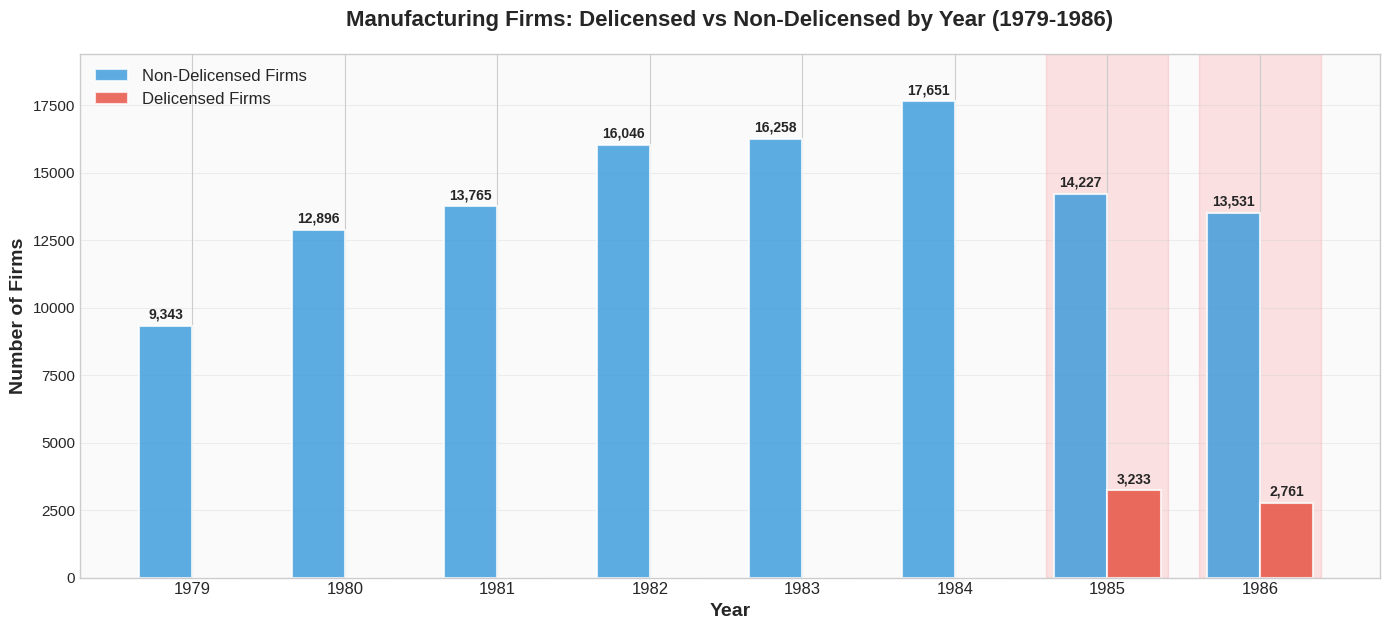

=== SUMMARY STATISTICS ===
1979: 9,343 active firms, 0 delicensed
1980: 12,896 active firms, 0 delicensed
1981: 13,765 active firms, 0 delicensed
1982: 16,046 active firms, 0 delicensed
1983: 16,258 active firms, 0 delicensed
1984: 17,651 active firms, 0 delicensed
1985: 3,233 delicensed (18.5%), 14,227 active
1986: 2,761 delicensed (16.9%), 13,531 active


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create the data
data = {
    'Year': [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986],
    'num_delicensed': [0, 0, 0, 0, 0, 0, 3233, 2761],
    'total_firms': [9343, 12896, 13765, 16046, 16258, 17651, 17460, 16292]
}

df = pd.DataFrame(data)
# Calculate non-delicensed firms
df['non_delicensed'] = df['total_firms'] - df['num_delicensed']

# Set up the plot with reduced height (20% smaller)
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 6.4))  # Changed from (14, 8) to (14, 6.4)

# Set up bar positions
x = np.arange(len(df['Year']))
width = 0.35

# Colors
delicensed_color = '#E74C3C'  # Red for delicensed
non_delicensed_color = '#3498DB'  # Blue for non-delicensed

# Create grouped bars
bars1 = ax.bar(x - width/2, df['non_delicensed'], width,
               label='Non-Delicensed Firms', color=non_delicensed_color,
               alpha=0.8, edgecolor='white', linewidth=1.5)

bars2 = ax.bar(x + width/2, df['num_delicensed'], width,
               label='Delicensed Firms', color=delicensed_color,
               alpha=0.8, edgecolor='white', linewidth=1.5)

# Customize the plot
ax.set_title('Manufacturing Firms: Delicensed vs Non-Delicensed by Year (1979-1986)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Firms', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df['Year'], fontsize=12)
ax.tick_params(axis='y', labelsize=11)

# Add value labels on bars
def add_value_labels(bars, values):
    for bar, value in zip(bars, values):
        if value > 0:  # Only show labels for non-zero values
            height = bar.get_height()
            ax.annotate(f'{value:,}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=10, fontweight='bold')

add_value_labels(bars1, df['non_delicensed'])
add_value_labels(bars2, df['num_delicensed'])

# Add legend
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)

# Customize grid
ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)

# Set y-axis limit to show all data clearly
ax.set_ylim(0, max(df['total_firms']) * 1.1)

# Add a subtle background color
ax.set_facecolor('#FAFAFA')

# Highlight the years with delicensing
for i, year in enumerate(df['Year']):
    if df.iloc[i]['num_delicensed'] > 0:
        ax.axvspan(i-0.4, i+0.4, alpha=0.1, color='red', zorder=0)

plt.tight_layout()
plt.show()

# Print summary
print("=== SUMMARY STATISTICS ===")
for i, row in df.iterrows():
    year = row['Year']
    delicensed = row['num_delicensed']
    non_delicensed = row['non_delicensed']
    total = row['total_firms']

    if delicensed > 0:
        pct_delicensed = (delicensed / total) * 100
        print(f"{year}: {delicensed:,} delicensed ({pct_delicensed:.1f}%), {non_delicensed:,} active")
    else:
        print(f"{year}: {non_delicensed:,} active firms, 0 delicensed")

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reconstruct the data from your ftable output
data = {
    'Year': [1979, 1979, 1979, 1979, 1980, 1980, 1980, 1980, 1981, 1981, 1981, 1981,
             1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984,
             1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986],
    'Pro Worker': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
                   0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    'Pro Employer': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
                     0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'neutral_0': [0, 2631, 3128, 0, 0, 3567, 4107, 0, 0, 3793, 3895, 0, 0, 4317, 3984, 0,
                  0, 4458, 3620, 0, 0, 3699, 3091, 0, 0, 2713, 1990, 0, 0, 2474, 1485, 0],
    'neutral_1': [2742, 0, 0, 0, 4035, 0, 0, 0, 4819, 0, 0, 0, 6230, 0, 0, 0, 6625, 0, 0, 0,
                  9499, 0, 0, 0, 11684, 0, 0, 0, 11429, 0, 0, 0]
}

df = pd.DataFrame(data)

# Create a combined category column
conditions = [
    (df['pro_worker'] == 1) & (df['pro_employer'] == 0) & (df['neutral_1'] == 0),
    (df['pro_worker'] == 0) & (df['pro_employer'] == 1) & (df['neutral_1'] == 0),
    (df['neutral_1'] > 0) & (df['pro_worker'] == 0) & (df['pro_employer'] == 0)
]

choices = ['pro_worker', 'pro_employer', 'neutral']
df['category'] = np.select(conditions, choices, default='other')

# Aggregate counts by year and category
counts = df.groupby(['Year', 'category'])[['neutral_0', 'neutral_1']].sum().sum(axis=1).reset_index()
counts.columns = ['Year', 'category', 'count']
counts = counts[counts['category'] != 'other']

# Pivot for plotting
pivot_counts = counts.pivot(index='Year', columns='category', values='count').fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
colors = {'Pro Worker': '#3498db', 'Pro Employer': '#e74c3c', 'Neutral': '#2ecc71'}
width = 0.25

x = np.arange(len(pivot_counts.index))
for i, (category, color) in enumerate(colors.items()):
    plt.bar(x + i*width, pivot_counts[category], width, label=category, color=color)

plt.title('Distribution of Firms by Year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(x + width, pivot_counts.index)
plt.legend(title='Category')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, year in enumerate(pivot_counts.index):
    for j, category in enumerate(colors.keys()):
        value = pivot_counts.loc[year, category]
        if value > 0:
            plt.text(i + j*width, value + 50, f'{int(value):,}',
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

KeyError: 'Pro Worker'

<Figure size 1200x600 with 0 Axes>

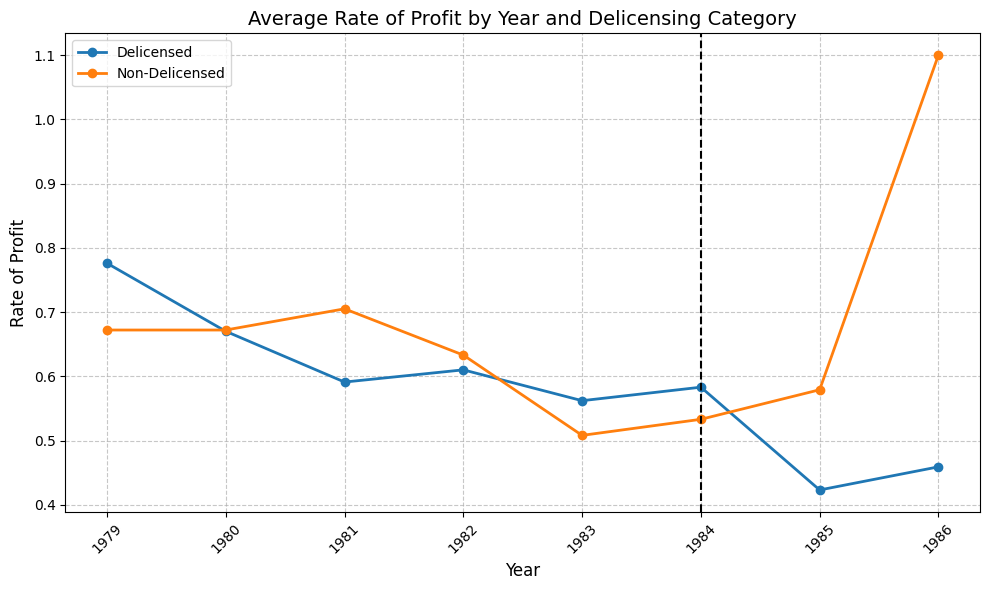

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'year': [1980, 1980, 1981, 1981, 1982, 1982, 1983, 1983,
             1984, 1984, 1985, 1985, 1986, 1986, 1987, 1987],
    'delin_group': [False, True, False, True, False, True, False, True,
                    False, True, False, True, False, True, False, True],
    'mean_profit_rate': [0.672, 0.776, 0.672, 0.670, 0.705, 0.591, 0.633, 0.610,
                         0.508, 0.562, 0.533, 0.583, 0.579, 0.423, 1.10, 0.459],
    'n_firms': [6197, 3146, 8788, 4108, 9671, 4094, 11538, 4508,
                11862, 4396, 13549, 4102, 14227, 3233, 13531, 2761],
    'n_rows': [6197, 3146, 8788, 4108, 9671, 4094, 11538, 4508,
               11862, 4396, 13549, 4102, 14227, 3233, 13531, 2761],
    'delin_group_label': ['Non-Delicensed', 'Delicensed'] * 8
}
profit_by_year = pd.DataFrame(data)
profit_by_year['year'] = profit_by_year['year'] - 1

plt.figure(figsize=(10, 6))

for group in ['Delicensed', 'Non-Delicensed']:
    group_data = profit_by_year[profit_by_year['delin_group_label'] == group]
    plt.plot(group_data['year'], group_data['mean_profit_rate'],
             marker='o', label=group, linewidth=2)

plt.axvline(x=1984, color='black', linestyle='--', label='')

plt.title('Average Rate of Profit by Year and Delicensing Category', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Profit', fontsize=12)
plt.legend(title='')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1979, 1987), rotation=45)
plt.tight_layout()